In [1]:
#import packages 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pandas_profiling import ProfileReport
import scipy.stats as stats

In [81]:
#import logins
logins = pd.read_json('logins.json')
logins.head()

login_time
0 1970-01-01 20:13:18
1 1970-01-01 20:16:10
2 1970-01-01 20:16:37
3 1970-01-01 20:16:36
4 1970-01-01 20:26:21

In [10]:
ProfileReport(logins)

In [12]:
np.where(logins == np.nan)

(array([], dtype=int64), array([], dtype=int64))

In [14]:
logins.describe()

login_time
count                 93142
unique                92265
top     1970-02-12 11:16:53
freq                      3
first   1970-01-01 20:12:16
last    1970-04-13 18:57:38

In [16]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [ ]:
###exploratory analysis

In [58]:
##login - Aggregate these login counts based on 15minute time intervals
logins.resample('15T', on='login_time').count()


login_time
login_time                     
1970-01-01 20:00:00           2
1970-01-01 20:15:00           6
1970-01-01 20:30:00           9
1970-01-01 20:45:00           7
1970-01-01 21:00:00           1
...                         ...
1970-04-13 17:45:00           5
1970-04-13 18:00:00           5
1970-04-13 18:15:00           2
1970-04-13 18:30:00           7
1970-04-13 18:45:00           6

[9788 rows x 1 columns]

In [ ]:
##visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand.


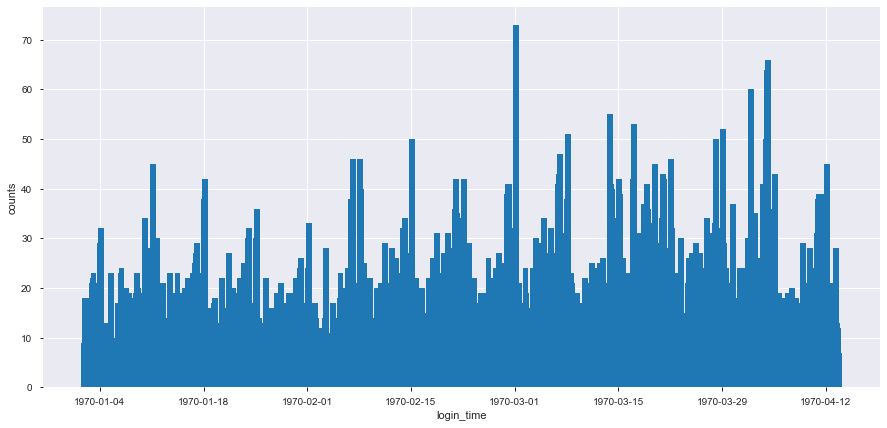

In [126]:
logins15 = logins.resample('15T', on='login_time').count()
logins15bar = plt.figure(figsize=(15, 7))
logins15bar = plt.bar(logins15.index, logins15.unstack().values)
logins15bar = plt.xlabel('login_time')
logins15bar = plt.ylabel('counts')
logins15bar = plt.xticks(pd.date_range('1970-01-01', '1970-04-13', freq='2W'))


In [ ]:
##report/illustrate important features of the demand, such as daily cycles.  

In [128]:
#by day of week
loginsbyday = logins.groupby(logins['login_time'].dt.dayofweek).count()
loginsbyday.head()

login_time
login_time            
0                 8823
1                 9268
2                10339
3                11960
4                15208

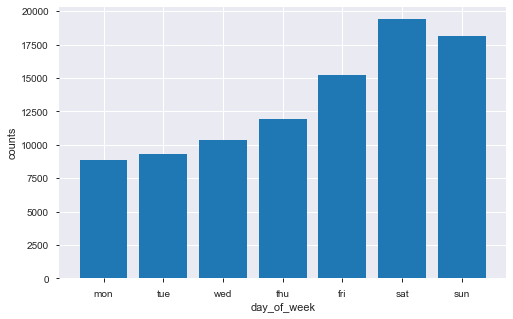

In [123]:
loginsdaybar = plt.figure(figsize=(8, 5))
loginsdaybar = plt.bar(loginsbyday.index, loginsbyday.unstack().values)
loginsdaybar = plt.xlabel('day_of_week')
loginsdaybar = plt.ylabel('counts')
loginsdaybar = plt.xticks(np.arange(7), ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'])


In [127]:
#by hour
loginsbyhour = logins.groupby(logins['login_time'].dt.hour).count()
loginsbyhour.head()

login_time
login_time            
0                 5993
1                 6317
2                 5800
3                 4831
4                 5034

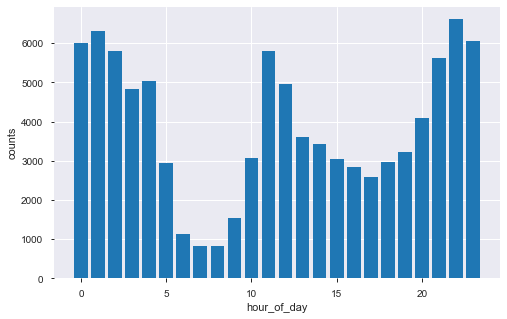

In [125]:
loginshourbar = plt.figure(figsize=(8, 5))
loginshourbar = plt.bar(loginsbyhour.index, loginsbyhour.unstack().values)
loginshourbar = plt.xlabel('hour_of_day')
loginshourbar = plt.ylabel('counts')


In [149]:
loginsbydayhour = logins.groupby([logins['login_time'].dt.weekday, logins['login_time'].dt.hour]).count()
loginsbydayhour.head()

login_time
login_time login_time            
0          0                  531
           1                  414
           2                  312
           3                  236
           4                  206

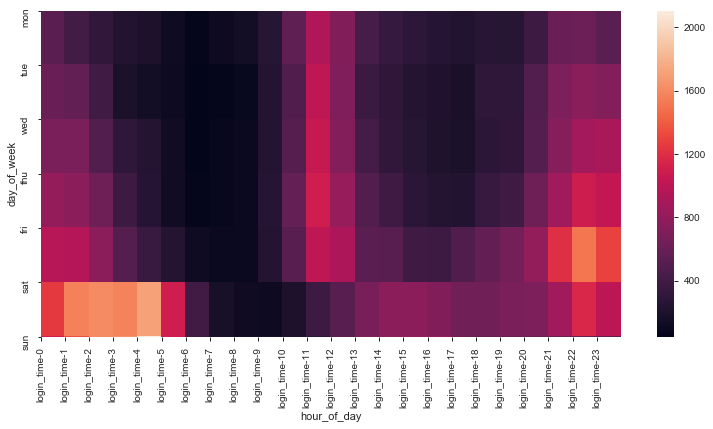

In [155]:
logindayhourheat = plt.figure(figsize=(13, 6))
logindayhourheat = sns.heatmap(loginsbydayhour.unstack())
logindayhourheat = plt.xlabel('hour_of_day')
logindayhourheat = plt.ylabel('day_of_week')
logindayhourheat = plt.yticks(np.arange(7), ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'])
logindayhourheat = plt.xticks(np.arange(24))

In [ ]:
##if there are data quality issues, please report them

In [ ]:
###experiment and metrics

##1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

There are quote a few measures I can think of to monitor if drivers are more motivated to serve both cities, such as simply tracking the cross city traffic baed on each toll transaction, or counting the amount of active drivers or rides in both cities during certain time periods, or tracking the amount of cross city drivers or cross city ride based on the driver’s signup location.
The more actionable key measure would be to set up an driver availability index (the amount of active driver in city X/the amount of registered driver in city X and Y) or an cross city driver index (the amount of driver from city X and active in city Y/the amount of registered driver in city X and Y) and calculate the index of two cities for certain time periods based on the traffic data from toll transactions.


##2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success.
Please provide details on:

#a. how you will implement the experiment

Assume city X has N drivers and city Y has M drivers and the population and market remains relatively stable, randomly select N/2 drivers from city X and M/2 drivers form city Y and reimburse all toll costs for them for about 2-3 weeks. Select time periods that tend to be busy during the week and the weekends from historical data and calculate the the driver availability index mentioned above during these time periods, compare to see if there’s a significant improvement on the number of available drivers.

#b. what statistical test(s) you will conduct to verify the significance of the observation

I would run bootstrap tests to get the confidence intervals of the index before and after the change, and permutation tests to see if the distribution has changed.

#c. how you would interpret the results and provide recommendations to the city
	operations team along with any caveats.
    
Depending on the confidence intervals and p values from the tests, I would recommend either doing more research to find the more effective and efficient way of implementing the policy, such as targeting drivers with high tendency to provide service in both cities or giving drivers different discount on toll costs based on the demand, or trying other ways to promote drivers’ availability such as ecourage customres to tip drivers or giving more flexibility to drivers.


In [ ]:
###predictive modeling

In [ ]:
##1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis 
#(a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

In [199]:
#import data
#ultimate = pd.read_json('ultimate_data_challenge.json',orient='split')
import json
with open('ultimate_data_challenge.json') as datafile:
    data = json.load(datafile)
ultimate = pd.DataFrame(data)

In [164]:
ultimate.head()

city  trips_in_first_30_days signup_date  avg_rating_of_driver  \
0  King's Landing                       4  2014-01-25                   4.7   
1         Astapor                       0  2014-01-29                   5.0   
2         Astapor                       3  2014-01-06                   4.3   
3  King's Landing                       9  2014-01-10                   4.6   
4      Winterfell                      14  2014-01-27                   4.4   

   avg_surge last_trip_date    phone  surge_pct  ultimate_black_user  \
0       1.10     2014-06-17   iPhone       15.4                 True   
1       1.00     2014-05-05  Android        0.0                False   
2       1.00     2014-01-07   iPhone        0.0                False   
3       1.14     2014-06-29   iPhone       20.0                 True   
4       1.19     2014-03-15  Android       11.8                False   

   weekday_pct  avg_dist  avg_rating_by_driver  
0         46.2      3.67                   5.0  
1         50.0      8.26                   5.0  
2        100.0      0.77                   5.0  
3         80.0      2.36                   4.9  
4         82.4      3.13                   4.9

In [166]:
ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null object
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null object
phone                     49604 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [165]:
ProfileReport(ultimate)

In [175]:
#data cleaning
#import packages
import category_encoders as ce


In [200]:
#cat to dt for last trip date and signup date
ultimate['last_trip_date'] = pd.to_datetime(ultimate['last_trip_date'])
ultimate['signup_date'] = pd.to_datetime(ultimate['signup_date'])
ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null datetime64[ns]
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null datetime64[ns]
phone                     49604 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB


In [201]:
#bool to num for ultimate black user
ultimate['ultimate_black_user'] = list(map(int, ultimate['ultimate_black_user']))
ultimate.head()

city  trips_in_first_30_days signup_date  avg_rating_of_driver  \
0  King's Landing                       4  2014-01-25                   4.7   
1         Astapor                       0  2014-01-29                   5.0   
2         Astapor                       3  2014-01-06                   4.3   
3  King's Landing                       9  2014-01-10                   4.6   
4      Winterfell                      14  2014-01-27                   4.4   

   avg_surge last_trip_date    phone  surge_pct  ultimate_black_user  \
0       1.10     2014-06-17   iPhone       15.4                    1   
1       1.00     2014-05-05  Android        0.0                    0   
2       1.00     2014-01-07   iPhone        0.0                    0   
3       1.14     2014-06-29   iPhone       20.0                    1   
4       1.19     2014-03-15  Android       11.8                    0   

   weekday_pct  avg_dist  avg_rating_by_driver  
0         46.2      3.67                   5.0  
1         50.0      8.26                   5.0  
2        100.0      0.77                   5.0  
3         80.0      2.36                   4.9  
4         82.4      3.13                   4.9

In [202]:
#cat to num for city and phone
#fill na in phone
ultimate['phone'] = ultimate['phone'].fillna('Unknown')
#one hot encoding 
ohcol = ['city', 'phone']
oh = ce.one_hot.OneHotEncoder(verbose=0, use_cat_names=True, cols=ohcol)
ultimate = oh.fit_transform(ultimate)
ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
city_King's Landing       50000 non-null int64
city_Astapor              50000 non-null int64
city_Winterfell           50000 non-null int64
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null datetime64[ns]
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null datetime64[ns]
phone_iPhone              50000 non-null int64
phone_Android             50000 non-null int64
phone_Unknown             50000 non-null int64
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null int64
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
dtypes: datetime64[ns](2), float64(6), int64(8)
memory usage: 6.1 MB


In [203]:
ultimate.head()

city_King's Landing  city_Astapor  city_Winterfell  trips_in_first_30_days  \
0                    1             0                0                       4   
1                    0             1                0                       0   
2                    0             1                0                       3   
3                    1             0                0                       9   
4                    0             0                1                      14   

  signup_date  avg_rating_of_driver  avg_surge last_trip_date  phone_iPhone  \
0  2014-01-25                   4.7       1.10     2014-06-17             1   
1  2014-01-29                   5.0       1.00     2014-05-05             0   
2  2014-01-06                   4.3       1.00     2014-01-07             1   
3  2014-01-10                   4.6       1.14     2014-06-29             1   
4  2014-01-27                   4.4       1.19     2014-03-15             0   

   phone_Android  phone_Unknown  surge_pct  ultimate_black_user  weekday_pct  \
0              0              0       15.4                    1         46.2   
1              1              0        0.0                    0         50.0   
2              0              0        0.0                    0        100.0   
3              0              0       20.0                    1         80.0   
4              1              0       11.8                    0         82.4   

   avg_dist  avg_rating_by_driver  
0      3.67                   5.0  
1      8.26                   5.0  
2      0.77                   5.0  
3      2.36                   4.9  
4      3.13                   4.9

In [216]:
#fill in missing values for avg rating of and by driver
#as for most companis the policy for default rating of drivers and by drivers is to give them a 5
#I treat the missing values in ratings as default
ultimate['avg_rating_of_driver'] = ultimate['avg_rating_of_driver'].fillna(5)
ultimate['avg_rating_by_driver'] = ultimate['avg_rating_by_driver'].fillna(5)
ultimate.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
city_King's Landing       50000 non-null int64
city_Astapor              50000 non-null int64
city_Winterfell           50000 non-null int64
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null datetime64[ns]
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null datetime64[ns]
phone_iPhone              50000 non-null int64
phone_Android             50000 non-null int64
phone_Unknown             50000 non-null int64
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null int64
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
dtypes: datetime64[ns](2), float64(6), int64(8)
memory usage: 6.1 MB


In [229]:
#a user retained if they were “active” (i.e. took a trip) in the preceding 30 days
#here I go by the latest date from last trip date
last = [last.days for last in ultimate['last_trip_date'].max() - ultimate['last_trip_date']]
ultimate['is_active'] = [days <= 30 for days in last]
ultimate['is_active'] = list(map(int, ultimate['is_active']))

In [230]:
ProfileReport(ultimate)

In [264]:
#exploratory
#active rate
active_rate = ultimate['is_active'].sum()/ultimate['is_active'].count()
active_rate

0.37608

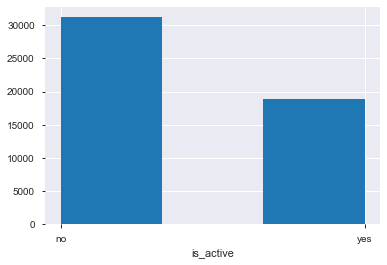

In [268]:
activeratehist = plt.hist(ultimate.is_active, bins=3)
activeratehist = plt.xlabel('is_active')
activeratehist = plt.xticks([0, 1], ['no', 'yes'])

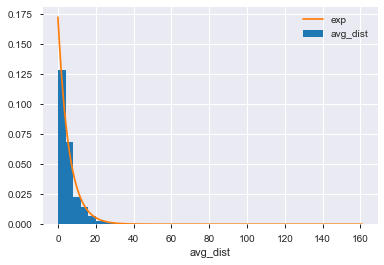

In [260]:
#avg dist pdf
avgdistloc, avgdistscale = stats.expon.fit(ultimate.avg_dist)
avgdisthist = plt.hist(ultimate.avg_dist, bins=40, normed=True, label='avg_dist')
avgdisthist = plt.plot(np.sort(ultimate.avg_dist), stats.expon.pdf(np.sort(ultimate.avg_dist), avgdistloc, avgdistscale), label='exp')
avgdisthist = plt.xlabel('avg_dist')
avgdisthist = plt.legend()


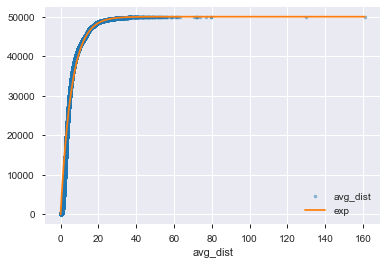

In [261]:
#avg dist ecdf
avgdistecdf = plt.plot(np.sort(ultimate.avg_dist), np.arange(1, len(ultimate.avg_dist)+1), marker='.', linestyle='none', alpha=0.5, label='avg_dist')
avgdistecdf = plt.plot(np.sort(ultimate.avg_dist), stats.expon.cdf(np.sort(ultimate.avg_dist), avgdistloc, avgdistscale)*(len(ultimate.avg_dist)+1), label='exp')
avgdistecdf = plt.legend()
avgdistecdf = plt.xlabel('avg_dist')
#avg dist seems to be exponentially distributed

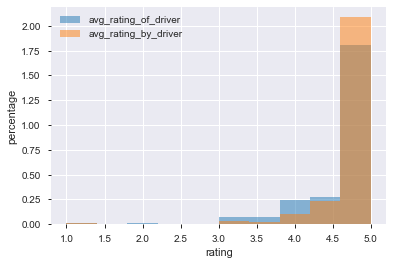

In [284]:
#ratings
ratingshist = plt.hist(ultimate.avg_rating_of_driver, alpha=0.5, normed=True, label='avg_rating_of_driver')
ratingshist = plt.hist(ultimate.avg_rating_by_driver, alpha=0.5, normed=True, label='avg_rating_by_driver')
ratingshist = plt.legend()
raitngshist = plt.xlabel('rating')
raitngshist = plt.ylabel('percentage')
#drivers tend to give higher ratings to riders

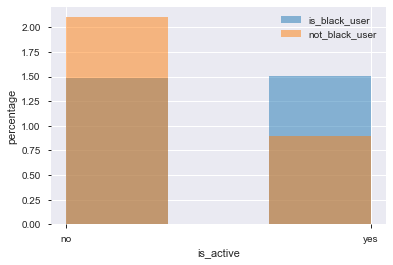

In [283]:
#active - black
isblack = ultimate.loc[ultimate['ultimate_black_user']==1]['is_active']
notblack = ultimate.loc[ultimate['ultimate_black_user']==0]['is_active']
blackhist = plt.hist(isblack, bins=3, alpha=0.5, normed=True, label='is_black_user')
blackhist = plt.hist(notblack, bins=3, alpha=0.5, normed=True, label='not_black_user')
blackhist = plt.xlabel('is_active')
blackhist = plt.xticks([0, 1], ['no', 'yes'])
blackhist = plt.ylabel('percentage')
blackhist = plt.legend()
#black user has higher retention rate

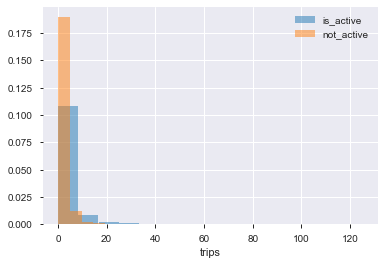

In [282]:
#active - first 30
isactivetrips = ultimate.loc[ultimate['is_active']==1]['trips_in_first_30_days']
notactivetrips = ultimate.loc[ultimate['is_active']==0]['trips_in_first_30_days']
tripshist = plt.hist(isactivetrips, alpha=0.5, label='is_active', normed=True, bins=15)
tripshist = plt.hist(notactivetrips, alpha=0.5, label='not_active', normed=True, bins=15)
tripshist = plt.xlabel('trips')
tripshist = plt.ylabel('percentage')
tripshist = plt.legend()
#active users tend to take more trips in first 30 days

In [ ]:
##2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. 
#Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model?
#Include any key indicators of model performance.


In [316]:
#logistic regression, random forest, gradient boosting, xgboost
#metrics - accuracy score, classification report, confusion matrix, roc auc curve
#cv
#import packages
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, make_scorer
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from category_encoders.ordinal import OrdinalEncoder

In [395]:
#6th month active after signup date 
last = [last.days for last in ultimate['last_trip_date'] - ultimate['signup_date']]
ultimate['is_active'] = [days <= 180 and days >=150 for days in last]
ultimate['is_active'] = list(map(int, ultimate['is_active']))

In [397]:
#transform date cols
X['signup_day_of_week'] = X['signup_date'].dt.dayofweek
X['last_trip_day_of_week'] = X['last_trip_date'].dt.dayofweek
X['signup_day_of_month'] = X['signup_date'].dt.day
X['last_trip_day_of_month'] = X['last_trip_date'].dt.day

In [398]:
datecols = ['signup_date', 'last_trip_date']
ordinal = OrdinalEncoder(cols=datecols)
X = ordinal.fit_transform(X, Y)

In [399]:
#standard scaler
scaler = StandardScaler()
dtcols = ['signup_date', 'last_trip_date', 'signup_day_of_week', 'signup_day_of_month', 'last_trip_day_of_week', 'last_trip_day_of_month']
for col in dtcols:
    X[col] = scaler.fit_transform(X[[col]])
    

In [400]:
X

city_King's_Landing  city_Astapor  city_Winterfell  \
0                        1             0                0   
1                        0             1                0   
2                        0             1                0   
3                        1             0                0   
4                        0             0                1   
...                    ...           ...              ...   
49995                    1             0                0   
49996                    0             1                0   
49997                    0             0                1   
49998                    0             1                0   
49999                    0             1                0   

       trips_in_first_30_days  signup_date  avg_rating_of_driver  avg_surge  \
0                           4    -1.629516                   4.7       1.10   
1                           0    -1.518518                   5.0       1.00   
2                           3    -1.407520                   4.3       1.00   
3                           9    -1.296521                   4.6       1.14   
4                          14    -1.185523                   4.4       1.19   
...                       ...          ...                   ...        ...   
49995                       0    -1.629516                   5.0       1.00   
49996                       1    -0.963527                   5.0       1.00   
49997                       0     0.035457                   5.0       1.00   
49998                       2     1.700431                   3.0       1.00   
49999                       0     0.812445                   5.0       1.00   

       last_trip_date  phone_iPhone  phone_Android  phone_Unknown  surge_pct  \
0           -1.450775             1              0              0       15.4   
1           -1.430564             0              1              0        0.0   
2           -1.410353             1              0              0        0.0   
3           -1.390142             1              0              0       20.0   
4           -1.369931             0              1              0       11.8   
...               ...           ...            ...            ...        ...   
49995        0.267160             1              0              0        0.0   
49996       -1.329509             1              0              0        0.0   
49997        0.873491             0              1              0        0.0   
49998        0.550114             1              0              0        0.0   
49999       -0.420014             0              1              0        0.0   

       ultimate_black_user  weekday_pct  avg_dist  avg_rating_by_driver  \
0                        1         46.2      3.67                   5.0   
1                        0         50.0      8.26                   5.0   
2                        0        100.0      0.77                   5.0   
3                        1         80.0      2.36                   4.9   
4                        0         82.4      3.13                   4.9   
...                    ...          ...       ...                   ...   
49995                    0        100.0      5.63                   4.2   
49996                    0          0.0      0.00                   4.0   
49997                    1        100.0      3.86                   5.0   
49998                    0        100.0      4.58                   3.5   
49999                    0          0.0      3.49                   5.0   

       signup_day_of_week  last_trip_day_of_week  signup_day_of_month  \
0                0.898829              -1.262377             0.965866   
1               -0.696367              -1.743598             1.422793   
2               -1.759830              -1.262377            -1.204537   
3                0.367097               1.143727            -0.747610   
4               -1.759830               0.662506             1.194330   
...                   ...

In [401]:
Y

0        0
1        0
2        0
3        1
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: is_active, Length: 50000, dtype: int64

In [402]:
#split data
x, xtest, y, ytest = train_test_split(X, Y, test_size=0.2, random_state=10)

In [403]:
#score func
def scores(x, y, xtest, ytest, clf):
    scores ={}
    clf.fit(x, y)
    ypred = clf.predict(xtest)
    scores['accuracy_score'] = accuracy_score(ytest, ypred)
    scores['roc_auc_score'] = roc_auc_score(ytest, ypred)
    return scores

accuracy = make_scorer(accuracy_score)
rocauc = make_scorer(roc_auc_score)

In [404]:
#dummy model
dummy = DummyClassifier()
scores(x, y, xtest, ytest, dummy)

{'accuracy_score': 0.6254, 'roc_auc_score': 0.5063783528255227}

In [405]:
#log reg
logreg = LogisticRegression()

In [406]:
cross_val_score(logreg, x, y, cv=5, scoring=accuracy)

array([0.84425 , 0.8505  , 0.843125, 0.843125, 0.84325 ])

In [407]:
cross_val_score(logreg, x, y, cv=5, scoring=rocauc)

array([0.75901101, 0.76907564, 0.758258  , 0.76021841, 0.75932187])

In [408]:
scores(x, y, xtest, ytest, logreg)

{'accuracy_score': 0.8454, 'roc_auc_score': 0.7654367021771331}

In [409]:
#gradient boost
gb = GradientBoostingClassifier()

In [410]:
cross_val_score(gb, x, y, cv=5, scoring=accuracy)

array([0.95875, 0.9545 , 0.9575 , 0.9585 , 0.955  ])

In [411]:
cross_val_score(gb, x, y, cv=5, scoring=rocauc)

array([0.92942389, 0.92282172, 0.92956741, 0.93072686, 0.92560691])

In [412]:
scores(x, y, xtest, ytest, gb)

{'accuracy_score': 0.9559, 'roc_auc_score': 0.9259375920930161}

In [413]:
#random forest
rf = RandomForestClassifier()

In [414]:
cross_val_score(rf, x, y, cv=5, scoring=accuracy)

array([0.968125, 0.956375, 0.95275 , 0.956125, 0.952375])

In [415]:
cross_val_score(rf, x, y, cv=5, scoring=rocauc)

array([0.9088323 , 0.9259773 , 0.92292126, 0.92234749, 0.94610656])

In [416]:
scores(x, y, xtest, ytest, rf)

{'accuracy_score': 0.9595, 'roc_auc_score': 0.9292480969336456}

In [417]:
#xgboost
xgb = XGBClassifier()

In [418]:
cross_val_score(xgb, x, y, cv=5, scoring=accuracy)

array([0.94525 , 0.94925 , 0.94775 , 0.949875, 0.948375])

In [419]:
cross_val_score(xgb, x, y, cv=5, scoring=rocauc)

array([0.91058569, 0.91489674, 0.91666997, 0.91613192, 0.91692495])

In [420]:
scores(x, y, xtest, ytest, xgb)

{'accuracy_score': 0.953, 'roc_auc_score': 0.9224672047679708}

In [ ]:
#random forest and gradient boost classifier seems to be better models

##3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).
Based on the prediction, Ultimate might want to look into reasons some customers are leaving and try to give them some incentives like coupons or black user free trials. Ultimate could also gather more data and update the model to make it more accurate in predictions, and if the up to date model starts to give significant lower predicted retenion rates, Ultimate might want to look into deeper reasons for churning.